In [8]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

Dans cette première partie nous allons voir en détails ce que contiennent les bases de données que nous avons trouver lors de nos recherches.

## Projet Python pour la data science (2023-2024)
*Thomas Chen, Félix de Champs, David Premachandra*  


## Introduction : 
<div align="justify">
Comme le montre ce graphique du site Statista les surfaces de forêts qui partent chaque année en fumée n'ont cessé d'augmenter au cours de la dernière décenies.  
  
![graph_statista](/graph_statista.PNG)
  
Les incendies de forêts sont donc une préoccupation croissante des populations et des pouvoirs publiques. En effet, ces millieu d'hectares brûlés représentent non seulement une catastrophe écologique, quand on connaît l'importance des forêts pour la biodiversité ou pour la captation du $ CO_{2}$, mais aussi dans certains cas une catastrophe humaine et matériel puisque 80 % des incendies de forêts se déclenchent à moins de 50 m des habitations selon le Ministère de l'Ecologie.  
On comprend alors l'importance de comprendre les circonstances de ces incendies pour mieux les prévenir, comme par exemple essayer de déterminer précisément quelles conditions climatiques vont sont les plus propices à l'apparition d'un feu de forêts.  
Notre projet à donc pour objectif de donner la probabilité qu'un feu de forêt se déclenche dans le Sud-Est de la France, en fonction des conditions météo comme nous allons le voir par la suite.


# I] Présentation des bases de données principales


### 0/ Récupération des données 

- On commence par importer les modules pour le traitement des données : pandas pour manipuler les dataframes, numpy pour faire des opérations mathématiques et datetime pour la manipulation des dates.

- Ensuite on va charger les différentes bases de données sur python en les faisant passer du format csv au format dataframe de pandas:  
  
  - la base de données sur les incendies de forêt est disponible via ce [lien](https://bdiff.agriculture.gouv.fr/incendies).  
  - la base de données météo est disponible via ce [lien](https://meteonet.umr-cnrm.fr/dataset/data/SE/ground_stations/).
  - la base de données sur les communes est disponible via ce [lien](https://www.data.gouv.fr/fr/datasets/r/dbe8a621-a9c4-4bc3-9cae-be1699c5ff25).


In [2]:
# Dataframe de la base de données sur les incendies: 
df_incendies = pd.read_csv(r"C:\Users\felix\Desktop\ensae-prog2A\data\Incendies_18.csv", sep = ';')

# Dataframe avec la base de données meteonet pour le quart sud-est :
df_meteo_SE = pd.read_csv(r'C:\Users\felix\Desktop\ensae-prog2A\data\meteonet\ground_stations\SE2018.csv')

# Dataframe avec juste les stations et leurs coordonnées GPS :
df_stations_SE = df_meteo_SE[['number_sta','lat','lon']]
df_stations_SE = df_stations_SE.drop_duplicates(subset='number_sta').reset_index()

# Dataframe avec la base de données permettant de faire la correspondance commune-coordonnées GPS :
df_communes = pd.read_csv(r"C:\Users\felix\Desktop\ensae-prog2A\data\communes.csv")
df_communes = df_communes[['code_commune_INSEE','latitude','longitude','nom_region']]
df_communes.columns = ['code_commune_INSEE', 'lat', 'lon', 'region']
# On se restrenint aux régions qui nous intéressent
liste_regions = ['Corse', "Provence-Alpes-Côte d'Azur", "Occitanie", "Auvergne-Rhône-Alpes", 'Nouvelle-Aquitaine']
df_communes = df_communes[df_communes['region'].isin(liste_regions)].drop_duplicates(subset = 'code_commune_INSEE').reset_index()
# Correction des codes communes INSEE des départements en 0X 
for i in df_communes.index :
    if len(df_communes['code_commune_INSEE'][i])==4 :
        df_communes['code_commune_INSEE'][i] = '0'+ df_communes['code_commune_INSEE'][i]


C:\Users\felix\AppData\Local\Temp\ipykernel_24908\2319082747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_communes['code_commune_INSEE'][i] = '0'+ df_communes['code_commune_INSEE'][i]
C:\Users\felix\AppData\Local\Temp\ipykernel_24908\2319082747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_communes['code_commune_INSEE'][i] = '0'+ df_communes['code_commune_INSEE'][i]
C:\Users\felix\AppData\Local\Temp\ipykernel_24908\2319082747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

### 1/ Base de données BDIFF

Cette base de donnée se définie comme "une application internet chargée de centraliser l'ensemble des données sur les incendies de forêt sur le territoire français depuis 2006 et de mettre l'ensemble de cette information à disposition du public et des services de l'Etat."  
  
Elle est éditée par l'IGN (Institut National de l'Information Géographique et Forestières).

Les données sur les incendies en 2018 sont contenues dans le dataframe df_incendies qui possède 1928 lignes et 37 colonnes. Chaque ligne correspond à un incendie.

In [3]:
print(df_incendies.shape)
print(df_incendies.columns)

(1634, 37)
Index(['Année', 'Numéro', 'Département', 'Code INSEE', 'Nom de la commune',
       'Date de première alerte', 'Origine de l'alerte',
       'Moyens de première intervention', 'Surface parcourue (m2)',
       'Surface forêt (m2)', 'Surface maquis garrigues (m2)',
       'Autres surfaces naturelles hors forêt (m2)', 'Surfaces agricoles (m2)',
       'Autres surfaces (m2)', 'Surface autres terres boisées (m2)',
       'Surfaces non boisées naturelles (m2)',
       'Surfaces non boisées artificialisées (m2)',
       'Surfaces non boisées (m2)', 'Précision des surfaces',
       'Surface de feu à l'arrivée des secours > 0,1 ha',
       'Voie carrossable la plus proche',
       'Activité ou habitation la plus proche', 'Type de peuplement',
       'Connaissance', 'Source de l'enquête', 'Nature',
       'Intervention de l'équipe RCCI', 'Décès ou bâtiments touchés',
       'Nombre de décès', 'Nombre de bâtiments totalement détruits',
       'Nombre de bâtiments partiellement détruits'

On dispose de données relatives:
- au temps avec la date d'alerte 
- aux surfaces parcourues par le feu
- à l'origine de l'incendie 
- aux dégats et décès provoquées par l'incendie

Une première façon d'approcher ces données sur les incendies est de les représenter sur une carte.  
C'est ce que permet de faire le notebook `visualisation_incendies.ipynb` appelé par la cellule suivante : 

C:\Users\felix\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


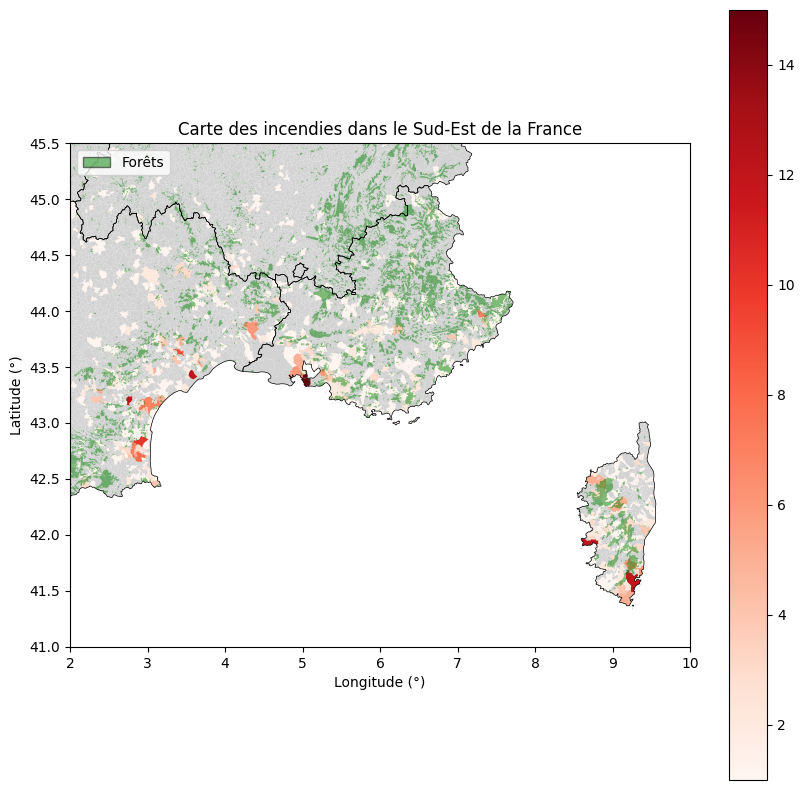

In [7]:
%run C:\Users\felix\Desktop\ensae-prog2A\visualisation_incendies.ipynb

<div align="justify">
Cette carte décrit le nombre d'incendies par commune dans le Sud-Est au cours de l'année 2018. On voit que plus on va vers le sud plus la densité d'incendie semble importante, avec des communes qui on jusqu'à quasiment une quinzaine d'incendie dans l'année environ, ce qui nous laisse penser qu'effectivement les condittions climatiques ont un effet sur la fréquence d'occurence des incendies. On voit également que les communes avec le plus de départ de feux ne sont pas forcément celles les plus proches des massifs forestiers représentés en vert.

Regardons à présent quelques statistiques descriptives sur les variables qualitatives relatives aux incendies:

On crée des colonnes mois et heure pour s'intéresser à l'occurence des incendies par rapport au temps.

In [4]:
df_incendies['date'] = pd.to_datetime(df_incendies['Date de première alerte'])
from datetime import datetime

df_hist_incendies = df_incendies.copy()

df_hist_incendies['date']=pd.to_datetime(df_hist_incendies['date'])
df_hist_incendies['mois']=df_hist_incendies['date'].dt.month
mois_noms = { 1: 'janvier', 2: 'février', 3: 'mars', 4: 'avril', 5: 'mai', 6: 'juin', 
             7: 'juillet', 8: 'août', 9: 'septembre', 10: 'octobre', 11: 'novembre', 12: 'décembre'}

df_hist_incendies['mois'] = df_hist_incendies['mois'].replace(mois_noms) #remplacer les valeurs numériques des mois par leurs noms

df_hist_incendies['heure']=pd.to_datetime(df_hist_incendies['Date de première alerte']).dt.hour


#### Histogrammes du nombre d'incendies par mois et par heure

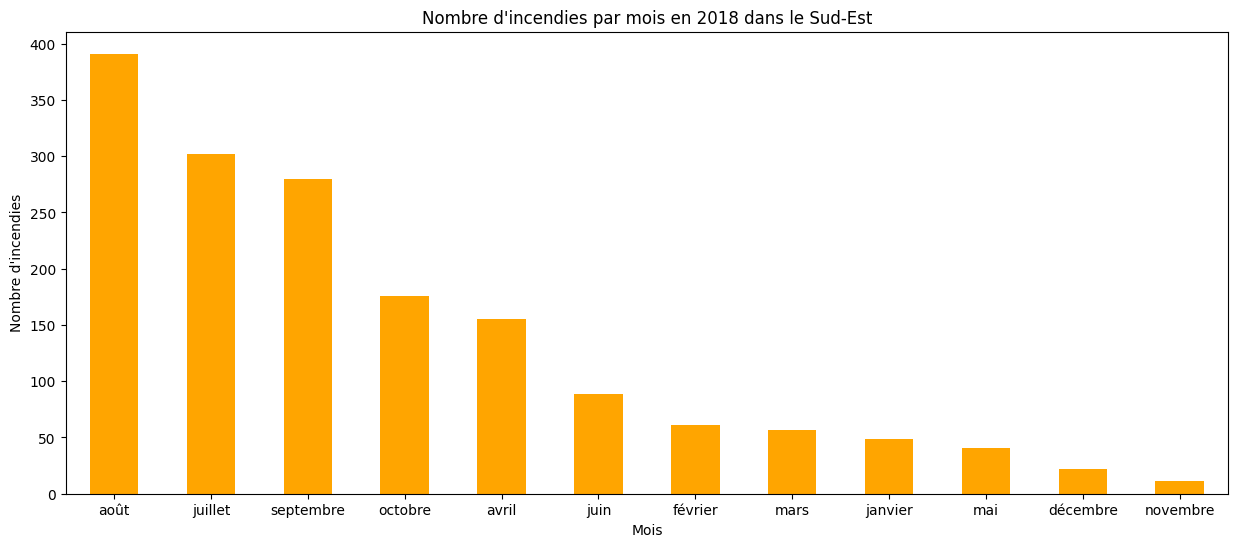

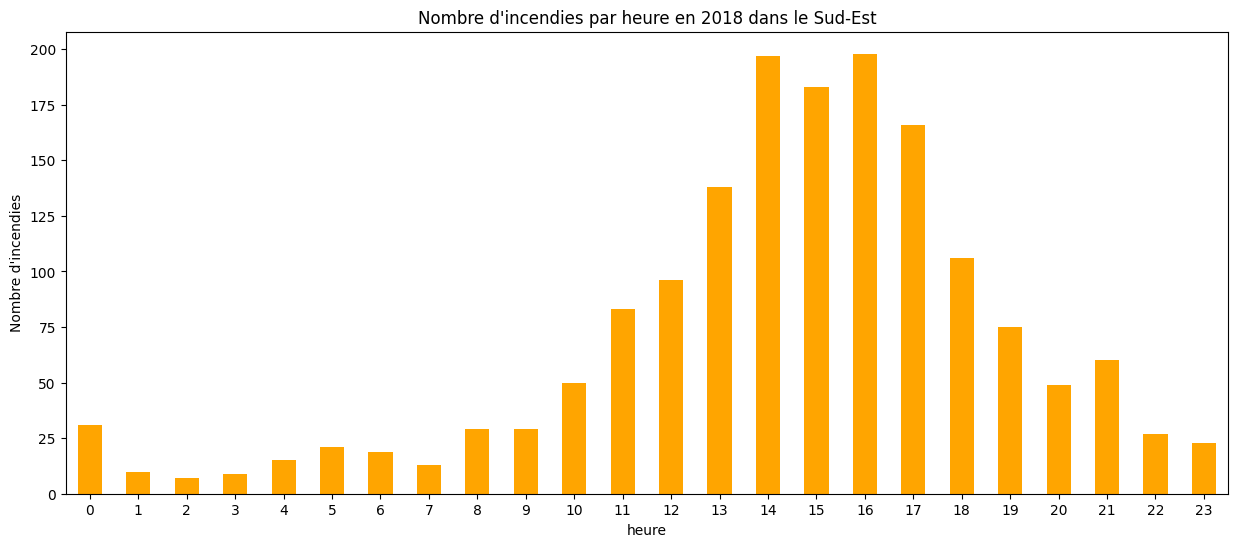

In [9]:
"histogramme du nombre d'incendies par mois"
plt.figure(figsize=(15, 6))
df_hist_incendies['mois'].value_counts().plot(kind='bar', color='orange')
plt.title('Nombre d\'incendies par mois en 2018 dans le Sud-Est')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'incendies')
plt.xticks(rotation=0)

"histogramme du nombre d'incendies par heure"
plt.figure(figsize=(15, 6))
df_hist_incendies['heure'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Nombre d\'incendies par heure en 2018 dans le Sud-Est')
plt.xlabel('heure')
plt.ylabel('Nombre d\'incendies')
plt.xticks(rotation=0)

plt.show()

<div align="justify">
En regardant l'occurence des incendies en 2018, on constate que les mois d'été connaissent bien plus d'incendies que les mois d'hiver et d'automne. Quant à l'heure, on remarque qu'un grand nombre d'incendies ont lieu dans l'après-midi. On peut supposer que cela est dû au climat d'été qui est d'avantage propice au déclenchement d'un feu de forêt. La variable heure qui correspond à l'heure du signalement de l'incendie doit vraisemblablement être proche de l'heure d'apparition du feu, on peut dire que les conditions climatiques dans l'après-midi sont plus favorables aux incendies que celles du matin ou de la nuit, ce sont les heures les plus chaudes de la journée. De plus la concentration des heures d'incendies dans l'après-midi peut être liée à la fréquentation qui semble jouer un rôle assez important puisque la plupart des incendies ont une cause non naturelle comme le montre le grahique suivant :

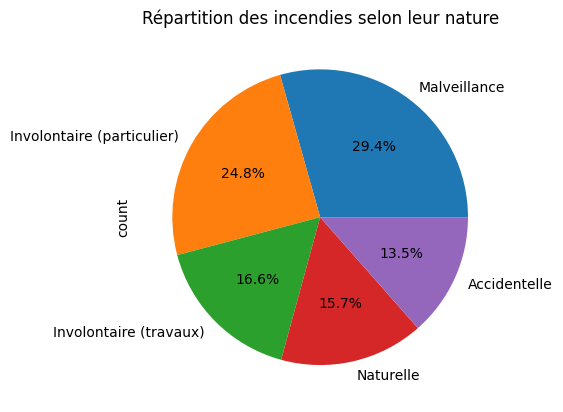

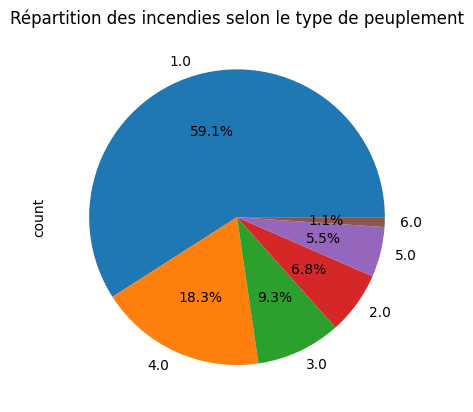

In [11]:
df_incendies['Nature'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Répartition des incendies selon leur nature")
plt.show()
df_incendies['Type de peuplement'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Répartition des incendies selon le type de peuplement")
plt.show()

En effet, 85% des incendies sont causés par l'homme. On observe également que certains types de peuplement c'est-à-dire une formation végétale spécifique sont plus touchés par les incendies. Le type de peuplement 1 qui représente 59% des incendies correspond aux Landes, garrigues et maquis, qui sont des végétations que l'on retrouve typiquement dans le Sud-Est de la France ou en Nouvelle-Aquitaine, régions les plus touchées par la problématiques des feux de forêts.  
Les autres types de peuplement sont dans l'ordre: taillis (2) / futaies feuillues (3) / futaies résineuses (4) / futaies mélangées (5) / régénération et reboisement (6).


### 2/ Base de données Meteonet

La base de données Meteonet est une base de données mise à disposition par Météo France pour encorager les projets de data science sur le thème de climat. Elle fournit en particulier des données météo au pas de 6 minutes pour 530 stations du quart Sud-Est de la France pendant 3 ans, de 2016 à 2018. Dans le cadre de ce projet nous nous sommes contentés d'utiliser les données pour l'année 2018.


Parmis ces données :

In [12]:
print(df_meteo_SE.columns)

Index(['number_sta', 'lat', 'lon', 'height_sta', 'date', 'dd', 'ff', 'precip',
       'hu', 'td', 't', 'psl'],
      dtype='object')


On retrouve des données spécifiques à la station :

<table>
<thead>
<tr>
<th>Nom</th>
<th>Description</th>
<th>Unité</th>
</tr>
</thead>
<tbody>
<tr>
<td>number_sta</td>
<td>ID de la station</td>
<td>-</td>
</tr>
<tr>
<td>lat</td>
<td>latitude</td>
<td>Degrés décimaux (10<sup>-1</sup> °)</td>
</tr>
<tr>
<td>lon</td>
<td>longitude</td>
<td>Degrés décimaux (10<sup>-1</sup> °)</td>
</tr>
<tr>
<td>height_sta</td>
<td>altitude de la station</td>
<td>mètres (m)</td>
</tr>
<tr>
<td>date</td>
<td> objet datetime</td>
<td>format 'YYYY-MM-DD HH: mm :ss'</td>
</tr>
</tbody>
</table>

et les données météorologiques

<table>
<thead>
<tr>
<th>Nom</th>
<th>Description</th>
<th>Unité</th>
</tr>
</thead>
<tbody>
<tr>
<td>dd</td>
<td>direction du vent</td>
<td>degrés (°)</td>
</tr>
<tr>
<td>ff</td>
<td>Vitesse du vent</td>
<td>m.s<sup>-1</sup></td>
</tr>
<tr>
<td>precip</td>
<td>Precipitations durant la période</td>
<td>kg.m<sup>2</sup></td>
</tr>
<tr>
<td>hu</td>
<td>Humidité</td>
<td>pourcentage (%)</td>
</tr>
<tr>
<td>td</td>
<td>Température de rosée*</td>
<td>Kelvin (K)</td>
</tr>
<tr>
<td>t</td>
<td>Température</td>
<td>Kelvin (K)</td>
</tr>
<tr>
<td>psl</td>
<td>Pression au niveau de lam mer</td>
<td>Pascal (Pa)</td>
</tr>
</tbody>
</table>

\* température de rosée : Le point de rosée ou température de rosée est la température sous laquelle de la rosée se dépose naturellement. Plus techniquement, en dessous de cette température qui dépend de la pression et de l'humidité ambiantes, la vapeur d'eau contenue dans l'air se condense sur les surfaces, par effet de saturation. (source Wikipedia)

Le code suivant permet de visualiser les différentes stations qu'offre le dataset :

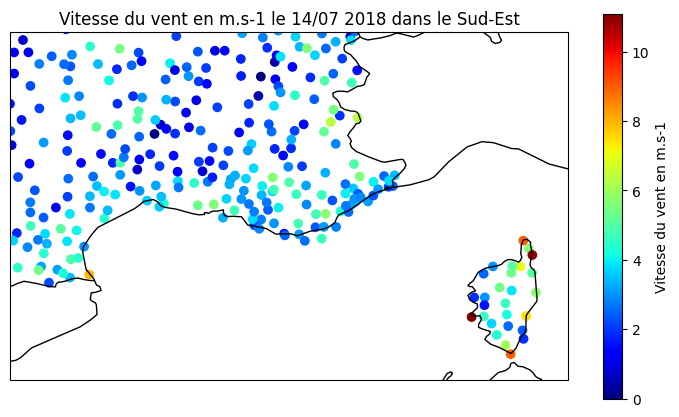

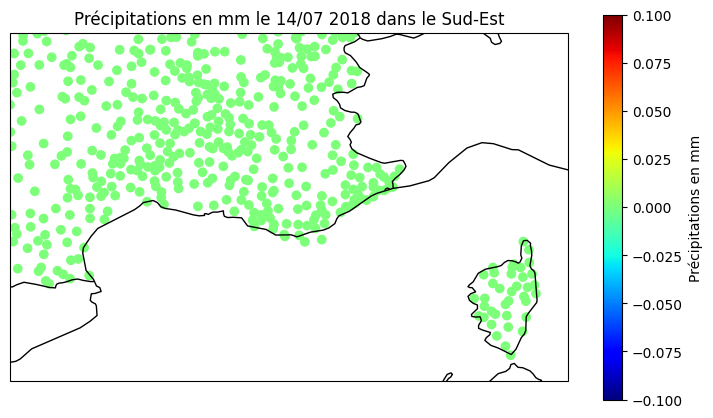

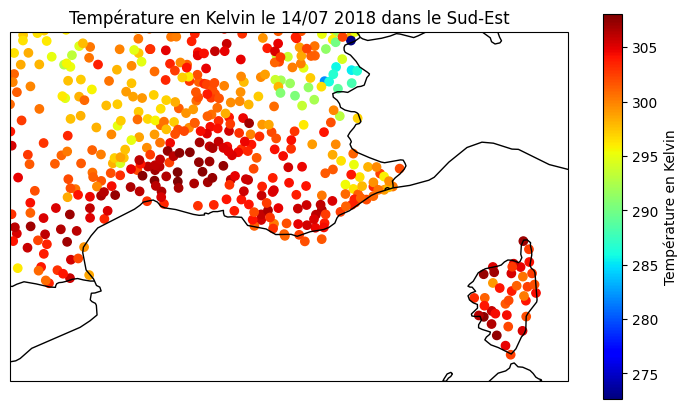

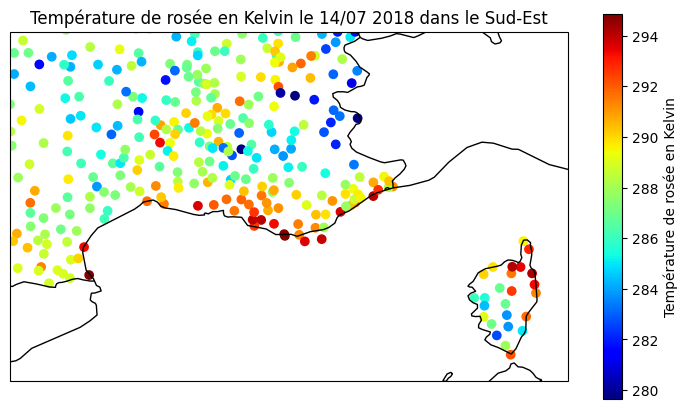

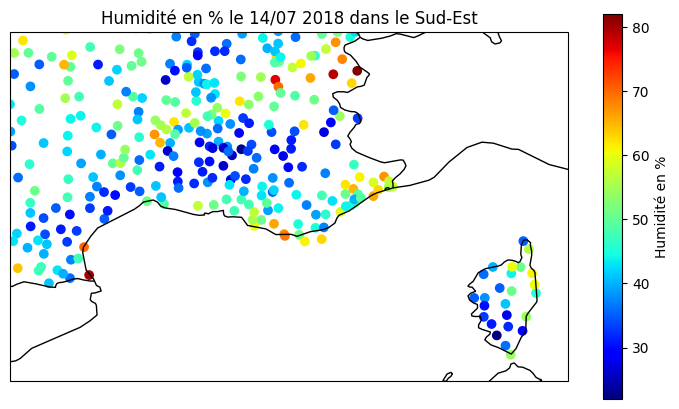

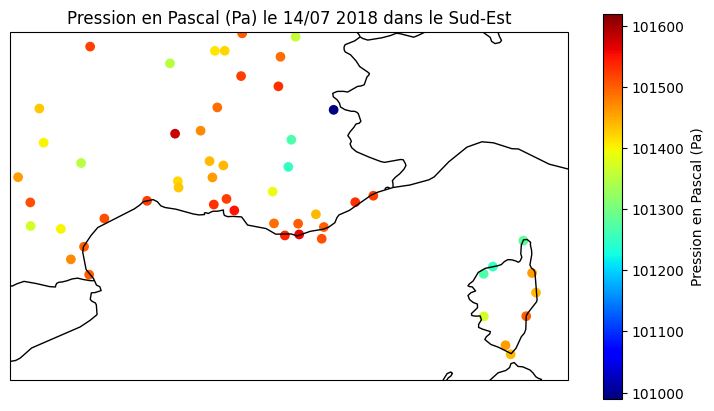

In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
date = "20180714 14:00"
dict_param = {'ff' : ['Vitesse du vent', 'm.s-1'],  'precip' : ['Précipitations', 'mm'], 't' : ['Température', 'Kelvin'], 
'td' : ['Température de rosée', 'Kelvin'], 'hu' : ['Humidité', '%'], 'psl' : ['Pression', 'Pascal (Pa)']} 
liste_param = dict_param.keys()
for param in liste_param : 
    nom_param, unite = dict_param[param]
    df = df_meteo_SE[df_meteo_SE['date'] == date]
    fenetre = [2, 10, 41, 46]
    #2, 41, 10, 45.5
    fig = plt.figure(figsize=(9,5))

    # on sélectionne une projection
    ax = plt.axes(projection=ccrs.PlateCarree())

    #  on fait un scatter plot
    scatter = plt.scatter(df['lon'], df['lat'], c=df[param], cmap='jet')

    # on ajouter les bordures et les côtes
    ax.coastlines(resolution='50m', linewidth=1)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))

    cbar = plt.colorbar(scatter)
    cbar.set_label(f'{nom_param} en {unite}')  # Mettez la description souhaitée pour la légende

    # on réduit au quart Sud-Est
    ax.set_extent(fenetre)
    # on ajoute un titre
    plt.title(f"{nom_param} en {unite} le {date[6:8]}/{date[4:6] } 2018 dans le Sud-Est")
    plt.show()



- Pour la vitesse du vent : on voit que là où il y  le vent le plus fort c'est au niveau des côtes et c'est également là où la densité d'incendie est la plus élévée si l'on regarde la carte de la partie précédente. Il se peut que la vitesse du vent joue effectivement un rôle.
- pour les précipitations : elles sont quasiment partout autour de 0 mm, cela est dû sans doute à la date que nous  avons choisi pour l'exemple, qui se trouve être en plein été
- Pour les températures : elles sont très élévées, avec un léger gradient vers le sud, et plus faible logiquement en altitude.
- Pour l'humidité : on remarque que logiquement les zones littorales sont les plus humides et que dès que l'on avance un peu dans l'arrière pays le % d'humidité décroit fortement.
-Pour ce qu est de la pression ramennée au niveau de la mer, les tendances spatiales sont difficiles à interpréter du fait de qu'il y a très peu de relevés.




## II] Création de la base de données finale


Maintenant que nous avons vu les bases de données que nous allons utiliser nous allons passer à l'étape suivante : manipuler les bases de données pour créer une base de donnée finale que l'on notera `df_final`.  
Cette base de données `df_final` sera composée des variables que l'on peut qualifier d'explicatives, i.e. les données météorologiques journalières pour chacune des communes du Sud-Est de la France, ainsi que de la variable cible (ou target en anglais) à savoir : présence ou non d'un incendie dans la commune ce jour.

**Obtenir les données météo journalières :** Les données du dataset de Météo France sont données toutes les 6 minutes pour chaque station sur l'ensemble de l'année. Nous avons donc décidé de les moyenner sur la journée afin réduire le nombre d'observations à une par jour et par station. Choisir la moyenne (au  lieu, du  max ou de la médiane par exemple) est un choix arbitraire, cependant la moyenne est une statistique qui capte la tendance globale de la journée tout en gardant une sensibilité aux valeurs extrêmes ce qui parait judicieux dans notre cas.  
C'est donc le sens de ce dataframe `df_meteo_moy`.

In [13]:
df_meteo_SE['date'] = pd.to_datetime(df_meteo_SE['date'])
df_meteo_moy = df_meteo_SE.groupby(['number_sta', pd.Grouper(key = 'date', freq = 'D')]).mean().reset_index()
display(df_meteo_moy.head())

,number_sta,date,lat,lon,height_sta,dd,ff,precip,hu,td,t,psl
0,1027003,2018-01-01,45.83,5.11,196.0,NaN,NaN,NaN,80.679167,277.326250,280.587917,NaN
1,1027003,2018-01-02,45.83,5.11,196.0,NaN,NaN,NaN,76.962343,276.310084,280.177311,NaN
2,1027003,2018-01-03,45.83,5.11,196.0,NaN,NaN,NaN,80.033333,278.724167,282.273333,NaN
3,1027003,2018-01-04,45.83,5.11,196.0,NaN,NaN,NaN,93.241667,281.604583,282.673333,NaN
4,1027003,2018-01-05,45.83,5.11,196.0,NaN,NaN,NaN,82.687500,281.308333,284.290833,NaN


- On va ensuite vouloir associer à chaque commune la station météorologique la plus proche pour pouvoir avoir accès à la météo journalière de la commune en question. Pour cela on a besoin de calculer la distance entre la position GPS de la commune et celle de la station météo, on utilise donc cette fonction : 

In [14]:
def distance(lat1,lon1,lat2,lon2):
    """ 
    INPUT : les coordonnées GPS de deux points
    
    OUTPUT : la distance entre ces deux points à vol d'oiseau
    """
    return 6371*np.arccos(np.sin(lat1*np.pi/180)*np.sin(lat2*np.pi/180)+np.cos(lat1*np.pi/180)*np.cos(lat2*np.pi/180)*np.cos((lon2-lon1)*np.pi/180))


Cependant `df_meteo_moy` ne contient pas d'information sur la commune où se trouve la station. Nous allons donc devoir faire appelle à une nouveau dataframe appelé `df_commune` qui contient les codes communes INSEE ainsi que les coordonnées GPS des communes.

 La cellule suivante permet de d'obtenir pour chaque commune la station météo la plus proche en distance. Pour chaque commune on calcule la distance à chaque station et puis on séléctionne celle qui a la distance la plus faible.

In [15]:
plus_proche_station = np.zeros(len(df_communes))
for i in df_communes.index : 
    lat1 = df_communes.lat[i]
    lon1 = df_communes.lon[i]
    d_min = 100
    index_min = 0
    for j in df_stations_SE.index : 
        lat2 = df_stations_SE.lat[j]
        lon2 = df_stations_SE.lon[j]
        d = distance(lat1,lon1,lat2,lon2) 
        if d <= d_min :
            d_min = d
            index_min = j

    plus_proche_station[i] = df_stations_SE.number_sta[index_min]



 On va ensuite commencer la création du dataframe final ` df_final` en associant à chaque commune sa météo jounalière :

In [ ]:
df_final = df_communes

df_final['number_sta'] = pd.DataFrame(plus_proche_station.astype(int))

df_meteo_moy = df_meteo_moy.rename(columns={'lat' : 'lat_sta', 'lon' : 'lon_sta'})

df_final = df_final.merge(df_meteo_moy, on = 'number_sta', how = 'left')

df_final['date'] = pd.to_datetime(df_final['date'])

display(df_final.head(10))


,index,code_commune_INSEE,lat,lon,region,number_sta,date,lat_sta,lon_sta,height_sta,dd,ff,precip,hu,td,t,psl
0,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-05,46.038,5.044,280.0,NaN,NaN,0.000000,NaN,NaN,281.837879,NaN
1,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-14,46.038,5.044,280.0,NaN,NaN,0.000000,NaN,NaN,272.222642,NaN
2,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-15,46.038,5.044,280.0,NaN,NaN,0.006667,NaN,NaN,273.077083,NaN
3,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-16,46.038,5.044,280.0,NaN,NaN,0.008333,NaN,NaN,277.585000,NaN
4,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-17,46.038,5.044,280.0,NaN,NaN,0.011667,NaN,NaN,277.890417,NaN
5,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-18,46.038,5.044,280.0,NaN,NaN,0.000833,NaN,NaN,278.067917,NaN
6,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-19,46.038,5.044,280.0,NaN,NaN,0.052500,NaN,NaN,280.643333,NaN
7,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-20,46.038,5.044,280.0,NaN,NaN,0.000000,NaN,NaN,279.035000,NaN
8,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-21,46.038,5.044,280.0,NaN,NaN,0.025833,NaN,NaN,281.076667,NaN
9,0,01001,46.153426,4.926114,Auvergne-Rhône-Alpes,1235001,2018-12-22,46.038,5.044,280.0,NaN,NaN,0.000000,NaN,NaN,283.481667,NaN


Pour finaliser notre base de donnée en vue de lui appliquer des algorithmes de régression, il nous faut maintenant ajouter une colonne "incendie" qui prend la valeur 1 s'il y a eu un incendie déclaré ce jour dans la commune et 0 sinon : 

In [ ]:
# Ajustements sur le dataframe incendie en vue de la jointure avec la base finale
df_incendies['Date de première alerte'] = pd.to_datetime(df_incendies['Date de première alerte'])
df_incendies['date'] = df_incendies['Date de première alerte'].dt.date
df_incendies = df_incendies.rename(columns={'Code INSEE' : 'code_commune_INSEE'})
df_incendies_18 = df_incendies[df_incendies['Année'] == 2018]

In [ ]:
df_final['date'] = df_final['date'].dt.date

df_final = pd.merge(df_final, df_incendies_18, how='left', on=['date', 'code_commune_INSEE'])

colonnes_a_verifier = ["Origine de l'alerte",
       'Moyens de première intervention', 'Surface parcourue (m2)',
       'Surface forêt (m2)', 'Surface maquis garrigues (m2)',
       'Autres surfaces naturelles hors forêt (m2)', 'Surfaces agricoles (m2)',
       'Autres surfaces (m2)', 'Surface autres terres boisées (m2)',
       'Surfaces non boisées naturelles (m2)',
       'Surfaces non boisées artificialisées (m2)',
       'Surfaces non boisées (m2)', 'Précision des surfaces',
       "Surface de feu à l'arrivée des secours > 0,1 ha",
       'Voie carrossable la plus proche',
       'Activité ou habitation la plus proche', 'Type de peuplement',
       'Connaissance', "Source de l'enquête", 'Nature',
       "Intervention de l'équipe RCCI", 'Décès ou bâtiments touchés',
       'Nombre de décès', 'Nombre de bâtiments totalement détruits',
       'Nombre de bâtiments partiellement détruits', 'Hygrométrie (%)',
       'Vitesse moyenne du vent (Km/h)', 'Direction du vent',
       'Température (°C)', 'Précision de la donnée',
       "Présence d'un contour valide"]  
       
# Si sur une même ligne toutes les valeurs colonnes relatives à l'incendie sont "nan" c'est qu'il n'y a eu d'incendie

df_final['incendie'] = 1-df_final[colonnes_a_verifier].isna().all(axis=1).astype(int)

display(df_final.sample(10))

On va effectuer quelques vérifications pour voir si l'on a pas loupé des incendies, par exemple :

In [ ]:
diff = list(set(df_incendies_18['code_commune_INSEE'])-set(df_final[df_final['incendie']== 1]['code_commune_INSEE']))
print("codes commune INSEE de communes ayant eu des incendies n'apparaissant pas dans la table finale :\n",diff)
print(f"Ils sont au nombre de {len(diff)}.")

Comme on peut le constater avec les deux premiers chiffres de ces codes communes INSEE qui correspondent au département, les départements où se situent ces communes ne sont pas des départements du Sud-Est et donc leurs feux de forêts n'entre pas dans le cadre de notre étude.  
Pour les  quelques exeptions qui restent, nous avons conclu après vérification dans la base de données de la météo qu'il s'agit en fait de ville où les données météo ne sont pas disponibles le jour de l'incendie. 